In [2]:
!pip install pandas

  Using cached https://files.pythonhosted.org/packages/32/37/b0abb12e1e387ec63adfb5c7bb7bcbc05a7e1ae22a3604b03843d7b04e0b/pandas-0.25.3-cp36-cp36m-macosx_10_9_x86_64.whl
tensorflow-hub 0.4.0 requires protobuf>=3.4.0, which is not installed.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
import pandas as pd

In [60]:
train = pd.read_csv('mobilenet_mixed_train2.csv')
# eval = pd.read_csv('mobilenet5_pedraza__test_features.csv')
test = pd.read_csv('mobilenet_mixed_test2.csv')

In [61]:
all = pd.concat([train,test])

In [62]:
train.shape

(246, 1283)

In [63]:
all_feat = all.drop(['idx','prob0','target'],axis=1)

In [64]:
test_feat = test.drop(['idx','prob0','target'],axis=1)

In [65]:
all_feat.describe()

,val0,val1,val2,val3,val4,val5,val6,val7,val8,val9,...,val1270,val1271,val1272,val1273,val1274,val1275,val1276,val1277,val1278,val1279
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,...,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,0.684459,1.113066,0.289848,0.415071,0.701585,0.131783,0.680629,0.952999,0.979881,1.290688,...,1.110206,0.688545,0.131121,0.229088,0.718553,0.973613,0.388577,1.116002,1.346566,0.288360
std,0.483330,0.646902,0.357587,0.409767,0.399068,0.224685,0.558886,0.772650,0.582781,0.507557,...,0.535733,0.419442,0.175257,0.256630,0.420475,0.468860,0.369080,0.476933,0.608755,0.264061
min,0.048342,0.029485,0.000000,0.012568,0.000000,0.000000,0.000000,0.014770,0.000000,0.027192,...,0.005341,0.024987,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344979,0.588868,0.084595,0.158291,0.368054,0.002324,0.234539,0.463263,0.493263,0.946159,...,0.711263,0.400002,0.033699,0.026219,0.382715,0.666785,0.108634,0.779512,0.942471,0.085703
50%,0.563005,1.039392,0.170867,0.271147,0.742044,0.034570,0.554685,0.730894,0.920906,1.365671,...,1.078558,0.629835,0.073512,0.155725,0.691478,1.060918,0.282642,1.065681,1.368887,0.211730
75%,0.849645,1.521584,0.321542,0.474102,0.975741,0.161393,1.008125,1.123005,1.349823,1.649381,...,1.476501,0.907003,0.144278,0.333330,0.995000,1.308108,0.589780,1.403053,1.724384,0.441645
max,3.139416,3.227103,2.243778,2.264004,1.696896,1.533457,2.734865,4.498197,2.980125,2.464467,...,2.881494,2.145741,1.280920,1.382416,2.244331,1.947859,1.986973,2.987339,3.443796,1.284370


In [66]:
feats = all_feat.values

In [67]:
positive = all['target'] == 1
positive

0     False
1     False
2     False
3     False
4     False
      ...  
63     True
64     True
65     True
66     True
67     True
Name: target, Length: 314, dtype: bool

In [68]:
negative = all['target'] == 0
negative

0      True
1      True
2      True
3      True
4      True
      ...  
63    False
64    False
65    False
66    False
67    False
Name: target, Length: 314, dtype: bool

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(5)

In [71]:
X_pca = pca.fit_transform(feats)
test_pca = pca.transform(test_feat)

In [72]:
import matplotlib.pyplot as plt

No handles with labels found to put in legend.


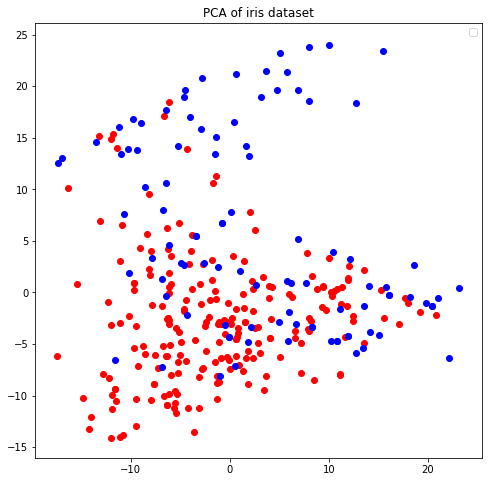

In [73]:
colors = ['navy', 'turquoise', 'darkorange']

X_transformed, title = X_pca, "PCA"
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[positive,0],X_pca[positive,1],color='r')
plt.scatter(X_pca[negative,0],X_pca[negative,1],color='b')
# plt.scatter(test_pca[:,0],test_pca[:,1],color='g')

plt.title(title + " of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

In [74]:
from sklearn.manifold import TSNE

In [75]:
tsne = TSNE(2, perplexity=15)

In [76]:
X_tsne = tsne.fit_transform(feats)
# test_tsne = tsne.transform(test_feat)

No handles with labels found to put in legend.


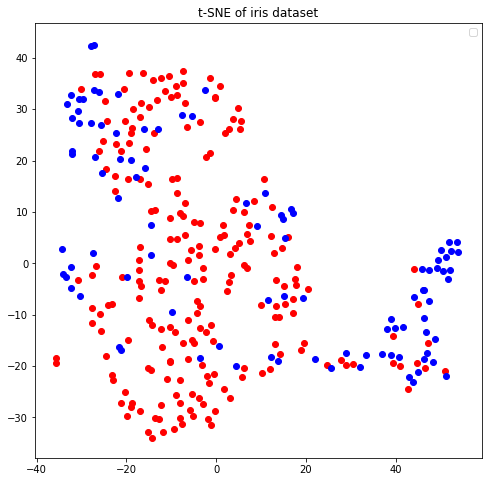

In [77]:
X_transformed, title = X_pca, "t-SNE"
plt.figure(figsize=(8, 8))
plt.scatter(X_tsne[positive,1],X_tsne[positive,0],color='r')
plt.scatter(X_tsne[negative,1],X_tsne[negative,0],color='b')
# plt.scatter(X_tsne[-46:,0],X_tsne[-46:,1],color='g')

plt.title(title + " of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show()

In [78]:
test.shape

(68, 1283)

In [79]:
eval.columns

Index(['idx', 'prob0', 'target', 'val0', 'val1', 'val2', 'val3', 'val4',
       'val5', 'val6',
       ...
       'val1272', 'val1273', 'val1274', 'val1275', 'val1276', 'val1277',
       'val1278', 'val1279', 'prob1', 'predt'],
      dtype='object', length=1285)

In [462]:
# eval = pd.read_csv('mobilenet_mixed_train2.csv')
test = pd.read_csv('resnet_mixed_test2.csv')

In [463]:
from sklearn.metrics import accuracy_score

In [464]:
eval['prob1'] = eval['prob0']
test['prob1'] = test['prob0']

In [465]:
from sklearn.metrics import roc_auc_score
roc_auc_score(eval['target'], eval['prob1'])

0.7560876623376623

In [466]:
roc_auc_score(test['target'], test['prob0'])

0.8339285714285714

In [467]:
eval[['prob1','target']].describe()

,prob1,target
count,246.000000,246.000000
mean,0.326048,0.715447
std,0.313402,0.452121
min,0.000597,0.000000
25%,0.044221,0.000000
50%,0.211879,1.000000
75%,0.562680,1.000000
max,0.992110,1.000000


In [468]:
test[['prob0','target']].describe()

,prob0,target
count,68.000000,68.000000
mean,0.626940,0.588235
std,0.369808,0.495812
min,0.000153,0.000000
25%,0.259201,0.000000
50%,0.809899,1.000000
75%,0.952329,1.000000
max,0.999327,1.000000


In [526]:
from sklearn.metrics import classification_report

In [565]:
threshold = 0.7
# eval['predt'] = (eval['prob0'] > threshold)
test['predt'] = (test['prob0'] > threshold)

In [568]:
accuracy_score(test['target'],test['predt'])

0.7647058823529411

In [569]:
classification_report(eval['target'],eval['predt'])

'              precision    recall  f1-score   support\n\n           0       0.34      0.97      0.50        70\n           1       0.96      0.24      0.39       176\n\n   micro avg       0.45      0.45      0.45       246\n   macro avg       0.65      0.61      0.45       246\nweighted avg       0.78      0.45      0.42       246\n'

In [604]:
classification_report(test['target'],test['predt'])

'              precision    recall  f1-score   support\n\n           0       0.70      0.75      0.72        28\n           1       0.82      0.78      0.79        40\n\n   micro avg       0.76      0.76      0.76        68\n   macro avg       0.76      0.76      0.76        68\nweighted avg       0.77      0.76      0.77        68\n'

In [478]:
accuracy_score(eval['target'],eval['predt'])

0.6626016260162602

In [573]:
utsw_test = pd.read_csv('resnet_mixed_utsw_test1.csv')

In [574]:
utsw_test.columns

Index(['idx', 'prob0', 'target', 'val0', 'val1', 'val2', 'val3', 'val4',
       'val5', 'val6',
       ...
       'val2038', 'val2039', 'val2040', 'val2041', 'val2042', 'val2043',
       'val2044', 'val2045', 'val2046', 'val2047'],
      dtype='object', length=2051)

In [575]:
roc_auc_score(utsw_test['target'], utsw_test['prob0'])

0.5196078431372549

In [607]:
threshold = 0.2
utsw_test['predt'] = (utsw_test['prob0'] > threshold)
accuracy_score(utsw_test['target'],utsw_test['predt'])

0.782608695652174

In [608]:
classification_report(utsw_test['target'],utsw_test['predt'])

'              precision    recall  f1-score   support\n\n           0       0.80      0.94      0.86        17\n           1       0.67      0.33      0.44         6\n\n   micro avg       0.78      0.78      0.78        23\n   macro avg       0.73      0.64      0.65        23\nweighted avg       0.77      0.78      0.76        23\n'